# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [15]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1250

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,5*1e6] 

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.7096303208 -7.87585782155
0.125910939409
i = 1
-19.5982195145 -5.41697326573
0.0924920244073
i = 2
-22.4390726387 -2.8789293802
0.0698897506047
i = 3
-24.6082675922 -0.377767503736
0.0547611942408
i = 4
-26.3254374724 2.11690106136
0.0462782606223
i = 5
-27.6770941525 4.66593731727
0.0420760970755
i = 6
-28.7145598686 7.27804049713
0.0408190375928
i = 7
-29.472894837 9.85242220764
0.0390338790696
i = 8
-30.0001781422 12.294421061
0.0361985732507
i = 9
-30.3186692203 14.5817753132
0.0334328637324
i = 10
-30.4699366866 16.6622036115
0.0297258670202
i = 11
-30.5016235011 18.5015063567
0.0252417312157
i = 12
-30.4562468234 20.0986096123
0.0206523298407
i = 13
-30.3716027737 21.4589395208
0.0161152146247
i = 14
-30.2700485654 22.5986857421
0.0120219615814
i = 15
-30.1595992992 23.5439115066
0.00870705330708
i = 16
-30.052255291 24.3287902766
0.00624784305978
i = 17
-29.9546824431 24.9861257647
0.00450822090409
i = 18
-29.8706203002 25.5338385644
0.0031894157193
i = 19
-29.79412443

-30.363527562 21.526072889
0.0145251024118
i = 14
-30.25617655 22.6578982411
0.01093184121
i = 15
-30.1409911816 23.5972924941
0.00792843167189
i = 16
-30.0301526047 24.3767234358
0.00568127368377
i = 17
-29.9311766307 25.0255858717
0.00404657404738
i = 18
-29.844923145 25.5701776012
0.00290480023346
i = 19
-29.7666639952 26.0498401916
0.00228736146641
i = 20
-29.6960489181 26.4741781516
0.00181126519136
i = 21
-29.632554276 26.8537964818
0.00146211518049
i = 22
-29.5757759567 27.19856366
0.00121222534
i = 23
-29.5266671695 27.5117410414
0.00100098395202
i = 24
-29.483253737 27.797117465
0.000832702800107
i = 25
-29.4427800438 28.0593519749
0.000706875985439
i = 26
-29.4047890234 28.3013717953
0.000605189214258
i = 27
-29.3678673734 28.5268466573
0.000529171601809
i = 28
-29.3312916877 28.737831196
0.000467595337578
i = 29
-29.2947504725 28.9344837375
0.000410761871532
i = 30
-29.2585638789 29.1177432388
0.000360596793909
i = 31
-29.2225949044 29.2888881908
0.000318266515743
i = 32
-29

-34.1830362774 19.0861301671
0.0250229947165
i = 5
-34.6244533074 23.1370950163
0.0144697746712
i = 6
-34.6678655498 26.0523207546
0.00770727375645
i = 7
-34.5300380352 28.0745204408
0.00391400476671
i = 8
-34.3332306978 29.4645391456
0.00198119543395
i = 9
-34.1291796989 30.4259156447
0.00102661659187
i = 10
-33.9370442754 31.1012361364
0.000555375389068
i = 11
-33.7643703444 31.5815176133
0.000311783489445
i = 12
-33.6127577705 31.9278350403
0.000181994191947
i = 13
-33.4818091918 32.1803403791
0.000109523066436
i = 14
-33.4818091918 32.1803403791
0.0


## L-curve visualization

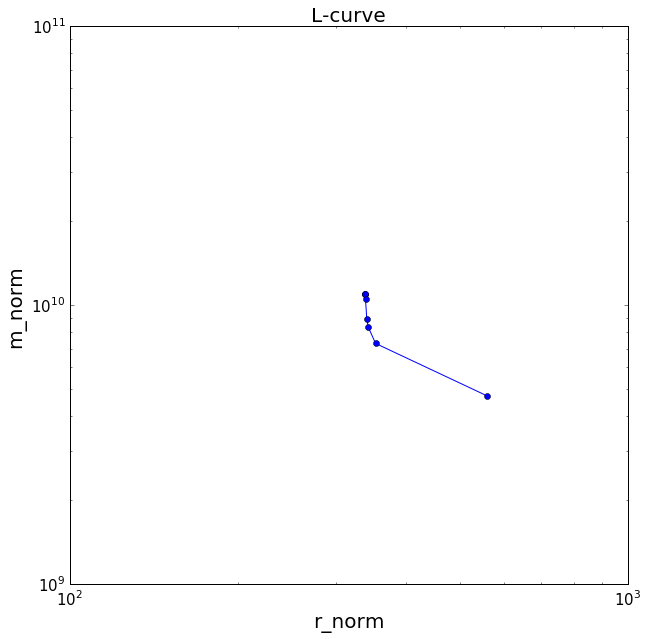

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
